In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [5]:
bc = load_breast_cancer()

In [6]:
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
bc.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
bc.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [10]:
data = pd.DataFrame(bc.data, columns = bc.feature_names)

In [11]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
data.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [13]:
bc.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [14]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [15]:
len(bc.target)

569

In [16]:
data.shape

(569, 30)

In [17]:
target = pd.DataFrame(bc.target, columns=["Target"])

In [18]:
target.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [19]:
x = data
x.shape

(569, 30)

In [20]:
y = target
y.shape

(569, 1)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.22, random_state= 42)

In [22]:
x_train.shape

(443, 30)

In [23]:
x_test.shape

(126, 30)

In [24]:
y_train.shape

(443, 1)

In [25]:
y_test.shape

(126, 1)

In [26]:
import warnings
warnings.filterwarnings("ignore")
lr = LogisticRegression()

In [27]:
lr.fit(x_test, y_test)

LogisticRegression()

In [28]:
lr.coef_

array([[ 4.25983794e-01, -1.63246693e-01,  1.42531366e+00,
        -1.42802812e-02, -5.04345740e-03, -3.36911900e-02,
        -6.10675062e-02, -2.30762118e-02, -6.16753253e-03,
         3.03220581e-04,  2.54081706e-02,  4.37140197e-02,
        -5.31787973e-03, -1.14981091e-01, -1.10614410e-03,
        -1.07465412e-02, -1.74296348e-02, -4.05486405e-03,
        -2.54005408e-03, -1.01439353e-03,  5.29278006e-01,
        -1.44281194e-01, -5.70106820e-01, -8.31404184e-02,
        -1.82030958e-02, -1.76981638e-01, -2.45906065e-01,
        -7.73499265e-02, -2.03685353e-02, -1.98742678e-02]])

In [29]:
lr.intercept_

array([0.08625559])

In [30]:
pred = lr.predict(x_test)

In [31]:
print("accuracy score", accuracy_score(y_test, pred))

accuracy score 1.0


In [32]:
print(confusion_matrix(y_test, pred))

[[47  0]
 [ 0 79]]


In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        79

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [37]:
y_pred_prob = lr.predict_proba(x_test)[:,1]

In [51]:
tpr, fpr, threshold = roc_curve(y_test, y_pred_prob)

In [52]:
fpr

array([0.        , 0.94936709, 1.        ])

In [53]:
tpr

array([0.        , 0.08510638, 1.        ])

In [54]:
threshold

array([2., 1., 0.])

<function matplotlib.pyplot.show(*args, **kw)>

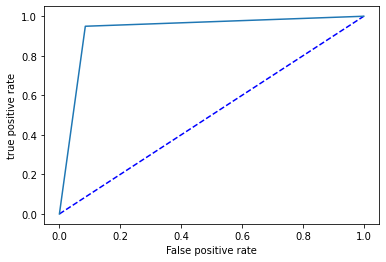

In [55]:
plt.plot([0,1], [0,1],'b--')
plt.plot(tpr, fpr)
plt.xlabel("False positive rate")
plt.ylabel("true positive rate")
plt.show

In [56]:
auc_score= roc_auc_score(y_test, lr.predict(x_test))
auc_score

1.0

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_pred, y_test))

0.9444444444444444


In [58]:
y_pred_prob = dt.predict_proba(x_test)[:,1]
y_pred_prob

array([1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0.])

In [59]:
tpr, fpr, threshold = roc_curve(y_test, y_pred_prob)

In [60]:
tpr

array([0.        , 0.08510638, 1.        ])

In [61]:
fpr

array([0.        , 0.96202532, 1.        ])

In [62]:
threshold

array([2., 1., 0.])

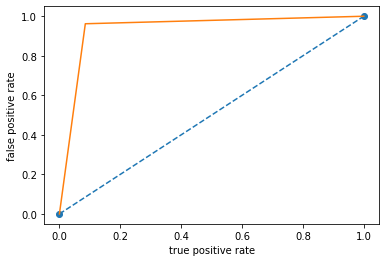

In [63]:
plt.plot([0,1], [0,1], "o--")
plt.plot(tpr, fpr)
plt.xlabel("true positive rate")
plt.ylabel("false positive rate")
plt.show()

In [64]:
auc_score = roc_auc_score(y_test, y_pred)

In [65]:
auc_score

0.9384594667384865